Data Wrangling 
Problem Statement: Data Wrangling on Real Estate Market 
Dataset: "RealEstate_Prices.csv" 
Description: The dataset contains information about housing prices in a specific real estate 
market. It includes various attributes such as property characteristics, location, sale prices, 
and other relevant features. The goal is to perform data wrangling to gain insights into the 
factors influencing housing prices and prepare the dataset for further analysis or modeling. 
Tasks to Perform: 
1.  Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, 
special characters, or renaming them for clarity. 
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g., 
imputation or removal). 
3. Perform data merging if additional datasets with relevant information are available 
(e.g., neighborhood demographics or nearby amenities). 
4. Filter and subset the data based on specific criteria, such as a particular time period, 
property type, or location. 
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or 
label encoding) for further analysis. 
6.  Aggregate the data to calculate summary statistics or derived metrics such as average 
sale prices by neighborhood or property type. 
7. Identify and handle outliers or extreme values in the data that may affect the analysis 
or modeling process. 

# 1

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv("D:/College/BE/CL-1/DMV Codes and Datasets/DMV New/Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# 2 & 3 & 4

In [49]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['balcony'] = pd.to_numeric(df['balcony'], errors='coerce')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13073 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [51]:
def category_size(total_sqft):
    if total_sqft<500:
        return 'small'
    elif total_sqft >= 500 and total_sqft<=1500:
        return 'medium' 
    else:
        return 'Larger'

df['Size_Category']=df['total_sqft'].apply(category_size)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Size_Category
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,medium
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,Larger
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,medium
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,Larger
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,medium


In [52]:
df['price_per_sqft'] = df['price'] / df['total_sqft']
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Size_Category,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,medium,0.036998
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,Larger,0.046154
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,medium,0.043056
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,Larger,0.062459
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,medium,0.042500


In [53]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
area_type            0
availability         0
location             1
size                16
society           5502
total_sqft         247
bath                73
balcony            609
price                0
Size_Category        0
price_per_sqft     247
dtype: int64


In [54]:
df.drop('society',axis=1,inplace=True)

In [55]:
df['balcony'] = df['balcony'].fillna(1)

In [56]:
df.dropna(inplace=True)

In [57]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column After Cleaning:")
print(missing_values)

Missing Values in Each Column After Cleaning:
area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
Size_Category     0
price_per_sqft    0
dtype: int64


In [58]:
print(df['area_type'].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [59]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['area_type', 'availability', 'location', 'size', 'Size_Category'], dtype='object')


In [60]:
avg_price_by_location = df.groupby('area_type')['price'].mean().reset_index()
print(avg_price_by_location)

              area_type       price
0        Built-up  Area  103.279150
1          Carpet  Area   93.789506
2            Plot  Area  209.714771
3  Super built-up  Area   92.734543


# 5

In [61]:
df1=df.copy()

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [63]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,Size_Category,price_per_sqft
0,3,40,416,13,1056.0,2.0,1.0,39.07,1,0.036998
1,2,79,314,19,2600.0,5.0,3.0,120.00,0,0.046154
2,0,79,1173,16,1440.0,2.0,3.0,62.00,1,0.043056
3,3,79,753,16,1521.0,3.0,1.0,95.00,0,0.062459
4,3,79,712,13,1200.0,2.0,1.0,51.00,1,0.042500
...,...,...,...,...,...,...,...,...,...,...
13315,0,79,1246,22,3453.0,4.0,0.0,231.00,0,0.066898
13316,3,79,998,18,3600.0,5.0,1.0,400.00,0,0.111111
13317,0,79,966,13,1141.0,2.0,1.0,60.00,1,0.052585
13318,3,32,901,18,4689.0,4.0,1.0,488.00,0,0.104073


# 6

In [64]:
df1.groupby('area_type')['price'].max()

area_type
Built-up  Area          2050.0
Carpet  Area             500.0
Plot  Area              3600.0
Super built-up  Area    2912.0
Name: price, dtype: float64

In [65]:
df1.groupby('size')['price'].max()

size
1 BHK          750.0
1 Bedroom      306.0
1 RK            52.0
10 BHK         525.0
10 Bedroom    3600.0
11 BHK         360.0
11 Bedroom     170.0
12 Bedroom     300.0
13 BHK         275.0
14 BHK         125.0
16 BHK         550.0
18 Bedroom     200.0
19 BHK         490.0
2 BHK          475.0
2 Bedroom      650.0
27 BHK         230.0
3 BHK         1015.0
3 Bedroom     2000.0
4 BHK         2912.0
4 Bedroom     2600.0
43 Bedroom     660.0
5 BHK         2700.0
5 Bedroom     2736.0
6 BHK         1000.0
6 Bedroom     2800.0
7 BHK         2200.0
7 Bedroom      972.0
8 BHK          310.0
8 Bedroom     1900.0
9 BHK          500.0
9 Bedroom     1200.0
Name: price, dtype: float64

In [76]:
df1.groupby('location')['price'].max()

location
 Anekal                  16.00
 Banaswadi               35.00
 Basavangudi             50.00
 Bhoganhalli             22.89
 Devarabeesana Halli    160.00
                         ...  
t.c palya               160.00
tc.palya                 78.00
vinayakanagar           200.00
white field,kadugodi    275.00
whitefiled               32.73
Name: price, Length: 1298, dtype: float64

# 7

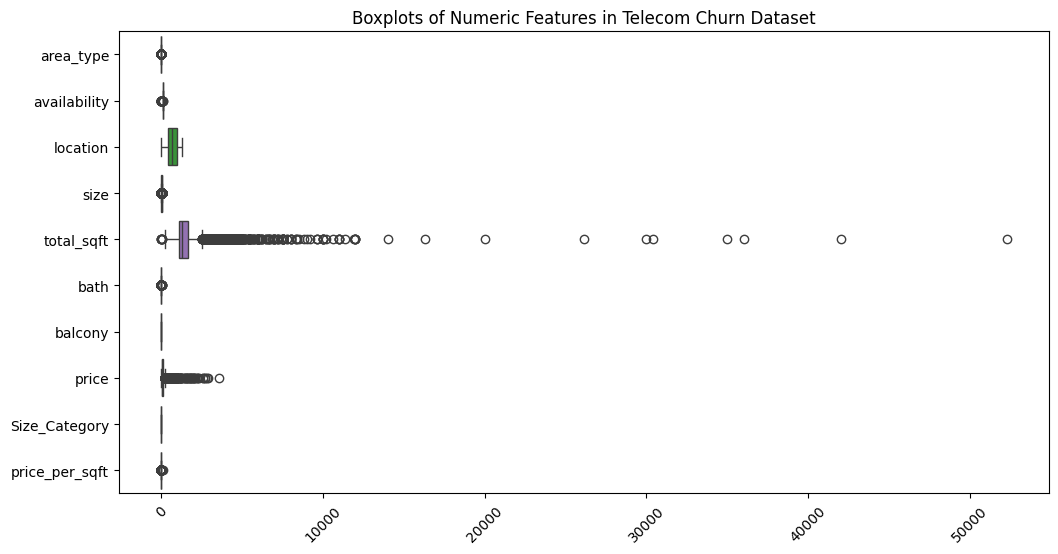

In [67]:
# Boxplot for all numeric columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['number']),orient='h')
plt.title("Boxplots of Numeric Features in Telecom Churn Dataset")
plt.xticks(rotation=45)
plt.show()


In [68]:
import numpy as np

# Example: remove outliers using IQR for numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


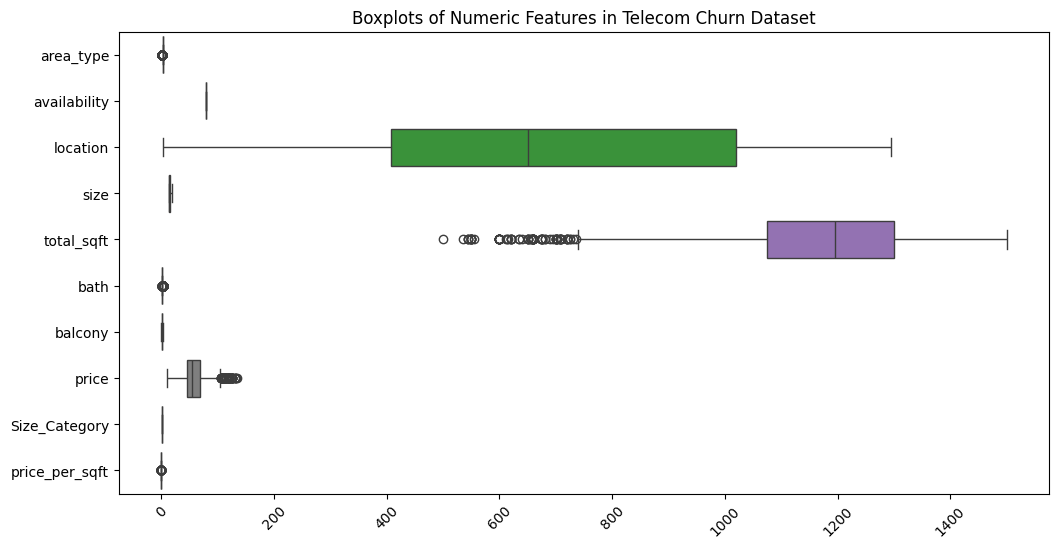

In [69]:
# Boxplot for all numeric columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['number']),orient='h')
plt.title("Boxplots of Numeric Features in Telecom Churn Dataset")
plt.xticks(rotation=45)
plt.show()
